# Additional Aerial LiDAR Datasets

This notebook will highlight the additional aerial LiDAR datasets besides USGS 3dep that are available in the `coincident` package and how to grab those datasets' footprints using spatial and temporal search parameters.

Other Supported Catalogs:
- NOAA Coastal LiDAR
- NCALM LiDAR
- NEON LiDAR

In [ ]:
import coincident
import geopandas as gpd

## OpenTopography API

`coincident` supports the use of the [OpenTopo /otCatalog API](https://portal.opentopography.org/apidocs/) to access additional aerial LiDAR data.


opentopo datasets currently supported includes the [NOAA Coastal LiDAR Catalog](https://coast.noaa.gov/htdata/lidar1_z/) and [NCALM Aerial LiDAR Catalog](https://calm.geo.berkeley.edu/ncalm/dtc.html). 

```{note}
The NCALM Aerial LiDAR Catalog also includes user-submitted flights
```

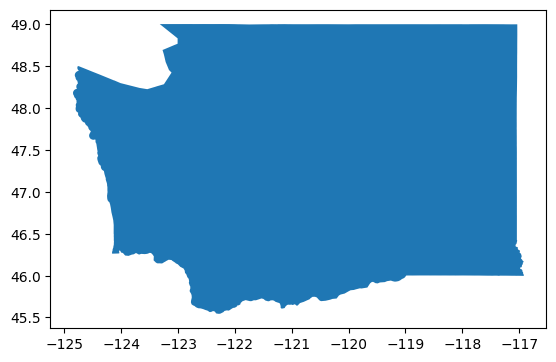

In [2]:
# first, we'll search for NOAA Coastal LiDAR missions in Washington
# we'll inspect 2018 arbitrarily
aoi = gpd.read_file(
    "https://raw.githubusercontent.com/unitedstates/districts/refs/heads/gh-pages/states/WA/shape.geojson"
)
date = "2018"
aoi.plot();

In [3]:
gf_noaa = coincident.search.search(dataset="noaa", intersects=aoi, datetime=[date])

In [4]:
gf_noaa

,id,title,start_datetime,end_datetime,geometry
0,9536,"2018 WA DNR Lidar: Green River Watershed, WA",2018-11-11,2018-11-12,"POLYGON ((-121.82611 47.3587, -121.85992 47.33..."
1,9546,2018 WA DNR Topobathy Lidar: Tacoma Water Serv...,2018-05-27,2018-05-28,"POLYGON ((-121.7511 47.32611, -121.77838 47.30..."
2,9549,2017 WA DNR Lidar: Tacoma Water Service Area -...,2017-12-05,2018-11-12,"POLYGON ((-122.37958 47.06531, -122.37311 47.0..."
3,9554,"2018 WA DNR Lidar: Yakima Basin North, WA",2018-07-24,2018-08-06,"POLYGON ((-120.54498 47.17468, -120.54089 47.1..."
4,9605,"2018 USFS Lidar: Tieton Basin, WA",2018-07-16,2018-07-18,"POLYGON ((-121.19459 46.37311, -121.15364 46.3..."
5,9673,"2018 USFS Lidar: Methow Basin, WA",2018-07-19,2018-10-11,"POLYGON ((-120.03089 48.2396, -120.05499 48.25..."
6,8932,"2018 OLC Lidar: Morrow County, OR",2018-10-03,2018-11-15,"MULTIPOLYGON (((-119.43372 45.91931, -119.5142..."
7,9211,2018 - 2019 USGS Lidar: Washington FEMA QL2,2018-08-05,2019-05-06,"MULTIPOLYGON (((-117.22388 47.26031, -117.2282..."


In [5]:
gf_noaa.explore(column="title", cmap="Set1")

In [6]:
# now, let's see if there were any NCALM missions from the same year
gf_ncalm = coincident.search.search(dataset="ncalm", intersects=aoi, datetime=[date])

In [7]:
gf_ncalm

,id,title,start_datetime,end_datetime,geometry
0,OTLAS.072019.6339.1,"High-Resolution Mapping of Goat Rock Volcano, WA",2018-09-19,2018-09-20,"POLYGON ((-121.46701 46.48376, -121.45914 46.4..."
1,OTLAS.112018.26910.1,Eagle Creek Fire Area in the Columbia River Go...,2018-05-03,2018-05-06,"MULTIPOLYGON (((-122.12419 45.58219, -121.9854..."


In [8]:
gf_ncalm.explore(column="id", cmap="Set3")

## NEON API

We also support the use of the [NEON Python API](https://www.neonscience.org/resources/learning-hub/tutorials/neon-api-intro-requests-py).

```{warning}
Searching large areas and/or large time periods in the NEON catalog will take a long time due to the limited spatiotemporal search supported by the API.
```

In [12]:
%%time
gf_neon = coincident.search.search(dataset="neon", intersects=aoi, datetime=[date])

/home/jehayes/mambaforge/envs/coincident/lib/python3.12/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


CPU times: user 1.82 s, sys: 62.7 ms, total: 1.88 s
Wall time: 3.49 s


In [13]:
gf_neon

,id,title,start_datetime,end_datetime,product_url,geometry
0,ABBY,Abby Road NEON,2018-07,2018-07,https://data.neonscience.org/api/v0/data/DP3.3...,"POLYGON ((-122.40104 45.70083, -122.232 45.700..."
1,WREF,Wind River Experimental Forest NEON,2018-07,2018-07,https://data.neonscience.org/api/v0/data/DP3.3...,"POLYGON ((-122.09866 45.77605, -121.7776 45.77..."


In [14]:
m = gf_noaa.explore(color="blue")
gf_ncalm.explore(m=m, color="black")
gf_neon.explore(m=m, color="deeppink")

## NASA LVIS

Currently, only a select number of LVIS flghts are supported due to the limited amount of LVIS products hosted on STAC catalogs:
- [ABoVE LVIS L2 Geolocated Surface Elevation Product, Version 1](https://nsidc.org/data/ablvis2/versions/1)
    - Search extent limited to bbox [-158, 48, -104, 72] and 2017-06-29 to 2017-07-17
- [AfriSAR LVIS L2 Geolocated Surface Elevation Product, Version 1](https://nsidc.org/data/aflvis2/versions/1)
    - Search extent limited to bbox [8, -2, 12, 1] and 2016-02-20 to 2016-03-08

```{warning}
Searching highly complex multi-polygons might break the STAC search, so simplifying your polygon before searching is recommended.
```

In [15]:
# first, let's look at the ABoVE product in Canada
aoi = gpd.read_file(
    "https://gist.githubusercontent.com/M1r1k/d5731bf39e1dfda5b53b4e4c560d968d/raw/c774258085ddc11776591ce95f2240d0fd0657a2/canada_provinces.geo.json"
)
aoi = aoi[aoi["name"] == "Yukon"].reset_index(drop=True)
# reduce complexity of multipolygon input
aoi.geometry = aoi.geometry.convex_hull

In [16]:
gf_lvis_ab = coincident.search.search(dataset="ablvis2_1", intersects=aoi)

In [17]:
print(gf_lvis_ab.shape)
gf_lvis_ab.head(2)

(120, 13)


,assets,bbox,collection,geometry,id,links,stac_extensions,stac_version,type,datetime,end_datetime,start_datetime,dayofyear
0,{'30/LVIS2_ABoVE2017_0630_R1803_071020': {'hre...,"{'xmin': -133.60073, 'ymin': 67.25842, 'xmax':...",ABLVIS2_1,"POLYGON ((-133.56719 67.45062, -133.57194 67.4...",SC:ABLVIS2.001:129489615,[{'href': 'https://cmr.earthdata.nasa.gov/stac...,[],1.0.0,Feature,2017-06-30 19:43:40.438000+00:00,2017-06-30 19:47:54.433000+00:00,2017-06-30 19:43:40.438000+00:00,181
1,{'30/LVIS2_ABoVE2017_0630_R1803_071274': {'hre...,"{'xmin': -133.84509, 'ymin': 67.41616, 'xmax':...",ABLVIS2_1,"POLYGON ((-133.69928 67.44517, -133.74165 67.4...",SC:ABLVIS2.001:129489178,[{'href': 'https://cmr.earthdata.nasa.gov/stac...,[],1.0.0,Feature,2017-06-30 19:47:54.433000+00:00,2017-06-30 19:49:17.458000+00:00,2017-06-30 19:47:54.433000+00:00,181


In [18]:
m = aoi.explore(color="gray")
gf_lvis_ab.clip(aoi).explore(m=m, column="datetime", cmap="inferno")

In [19]:
# now, let's look at AfriSAR LiDAR
# this polygon is already simplified
aoi = gpd.read_file(
    "https://raw.githubusercontent.com/glynnbird/countriesgeojson/refs/heads/master/gabon.geojson"
)

In [20]:
gf_lvis_af = coincident.search.search(
    dataset="aflvis2_1", intersects=aoi, datetime=["2016-02-20"]
)

In [21]:
print(gf_lvis_af.shape)
gf_lvis_af.head(2)

(17, 13)


,assets,bbox,collection,geometry,id,links,stac_extensions,stac_version,type,datetime,end_datetime,start_datetime,dayofyear
0,{'20/LVIS2_Gabon2016_0220_R1808_038024': {'hre...,"{'xmin': 9.78612, 'ymin': -0.17711, 'xmax': 10...",AFLVIS2_1,"POLYGON ((9.78612 0.16789, 9.78612 0.16429, 9....",SC:AFLVIS2.001:138345559,[{'href': 'https://cmr.earthdata.nasa.gov/stac...,[],1.0.0,Feature,2016-02-20 10:33:44.015000+00:00,2016-02-20 10:43:39.524000+00:00,2016-02-20 10:33:44.015000+00:00,51
1,{'20/LVIS2_Gabon2016_0220_R1808_038619': {'hre...,"{'xmin': 10.19384, 'ymin': -0.83624, 'xmax': 1...",AFLVIS2_1,"POLYGON ((10.19743 -0.15792, 10.19743 -0.1615,...",SC:AFLVIS2.001:138348873,[{'href': 'https://cmr.earthdata.nasa.gov/stac...,[],1.0.0,Feature,2016-02-20 10:43:39.525000+00:00,2016-02-20 10:58:47.545000+00:00,2016-02-20 10:43:39.525000+00:00,51


In [22]:
gf_lvis_af.explore(column="datetime", cmap="inferno")